<a href="https://colab.research.google.com/github/tranquynh310/Case-Taxi-Cancellation/blob/main/%5BMBBank%5D_Incredible_Debt_Group_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identify **incredible customers** based on their **financial transactions** and **debt classification group**.

As part of the requirements, you as a data analyst have to decide ***“Which group of debts are incredible”***, as long as it helps to distinguish between credible and incredible customers.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from numpy import sqrt
from numpy import argmax

In [ ]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.utils import class_weight
from sklearn.utils import resample

from sklearn.feature_selection import RFE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
import time

In [ ]:
df = pd.read_csv("dataset_finalterm.csv")
df.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Data Preprocessing

In [ ]:
df["nhomno_xhtdJuin2021"].value_counts(normalize=True)

nhomno_xhtdJuin2021
1.0    0.528475
2.0    0.282581
3.0    0.089398
4.0    0.079450
5.0    0.020096
Name: proportion, dtype: float64

In [ ]:
df["nhomno_xhtdJuin2021"].value_counts().to_frame().iloc[0:2,0].sum()

24296

In [ ]:
df["nhomno_xhtdJuin2021"].value_counts().to_frame().iloc[2:,0].sum()

5660

In [ ]:
5560*100/29951

18.563653968147975

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df["most_act_mar2021"] = df["most_act_mar2021"].str.lower()\
                            .str.replace("giao dich ", "")
df["most_act_mar2021"].unique()

array(['chuyen khoan', nan, 'phi tai chinh', 'thanh toan', 'rut tien atm',
       'tiet kiem'], dtype=object)

In [ ]:
df["most_act_juin2021"] = df["most_act_juin2021"].str.lower()\
                            .str.replace("giao dich ", "")
df["most_act_juin2021"].unique()

array(['chuyen khoan', 'thanh toan', nan, 'rut tien atm', 'tiet kiem',
       'phi tai chinh', 'vay'], dtype=object)

In [ ]:
df['customer_age'] = df['birth_incorp_date'].apply(lambda x: 2023 - x if not pd.isnull(x) else pd.NaT)
# Loại bỏ các KH có tuổi nhỏ hơn 18 hoặc lớn hơn 100
df = df[(df['customer_age'] >= 18) & (df['customer_age'] <= 100)]

In [ ]:
# Thay thế các trường missing trong "local_ref_1" bằng MALE
df["local_ref_1"].replace(np.nan, "MALE", inplace=True)

In [ ]:
df['local_ref_1'] = df['local_ref_1'].replace({'MALE': 0, 'FEMALE': 1}, inplace = True)

In [ ]:
df["vn_marital_status"].replace(np.nan, "Married", inplace=True)

In [ ]:
df['resid_district'].replace(np.nan, 6,inplace= True)
df['resid_province'].replace(np.nan, 1,inplace= True)

In [ ]:
df['distinct_payment_code_week'].replace(np.nan, 0, inplace= True)

df['distinct_payment_code_month'].replace(np.nan, 0, inplace= True)

df['distinct_payment_code_3month'].replace(np.nan, 0, inplace= True)

In [ ]:
df['count_payment_code_month'].replace(np.nan, 0, inplace= True)

df['count_payment_code_week'].replace(np.nan, 0, inplace= True)

In [ ]:
df["distinct_ref_no_week"].fillna(1, inplace = True)

In [ ]:
df["distinct_ref_no_month"].fillna(1, inplace = True)

In [ ]:
notna_nhomno = df.dropna(subset=['nhomno_xhtdJuin2021'], axis=0).reset_index()

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

df_filled = imputer.fit_transform(notna_nhomno[['max_amount_week', 'max_amount_month', 'max_amount_3month',
                                      'amount_week','amount_month','amount_3month',
                                     'min_amount_week', 'min_amount_month', 'min_amount_3month']])

In [ ]:
notna_nhomno['max_amount_week']=df_filled[:,0]
notna_nhomno['max_amount_month']=df_filled[:,1]
notna_nhomno['max_amount_3month']=df_filled[:,2]
notna_nhomno['amount_week']=df_filled[:,3]
notna_nhomno['amount_month']=df_filled[:,4]
notna_nhomno['amount_3month']=df_filled[:,5]
notna_nhomno['min_amount_week']=df_filled[:,6]
notna_nhomno['min_amount_month']=df_filled[:,7]
notna_nhomno['min_amount_3month']=df_filled[:,8]

ValueError: Length of values (29951) does not match length of index (29956)

# 2. EDA

## Initial Guess:

(1) Higher max amount per week/month/3 months --> Better debt group

(2) Higher total amount per week/month/3 months --> Better debt group

(3) Higher amount over time --> Better debt group

<Axes: xlabel='nhomno_xhtdJuin2021', ylabel='count'>

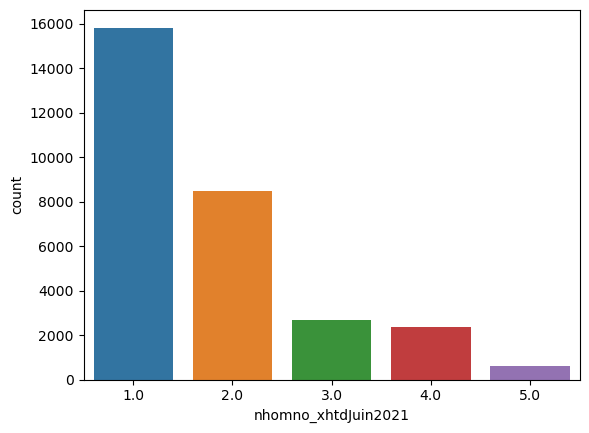

In [ ]:
sns.barplot(data=notna_nhomno['nhomno_xhtdJuin2021'].value_counts().reset_index(), x='nhomno_xhtdJuin2021', y='count')

In [ ]:
notna_nhomno = df.dropna(subset=['nhomno_xhtdJuin2021'], axis=0).reset_index()

In [ ]:
notna_nhomno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29956 entries, 0 to 29955
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         29956 non-null  int64  
 1   local_ref_1                   28969 non-null  object 
 2   vn_marital_status             28882 non-null  object 
 3   resid_province                27514 non-null  float64
 4   resid_district                27514 non-null  float64
 5   resid_wards                   27514 non-null  float64
 6   birth_incorp_date             29955 non-null  float64
 7    amount_week                  19227 non-null  float64
 8   max_amount_week               19227 non-null  float64
 9   min_amount_week               19227 non-null  float64
 10  distinct_payment_code_week    19600 non-null  float64
 11  count_payment_code_week       19600 non-null  float64
 12  distinct_trans_group_week     19600 non-null  float64
 13  d

In [ ]:
notna_nhomno.select_dtypes(include=['int64', 'float64']).corr().loc['nhomno_xhtdJuin2021'].to_frame().sort_values(by='nhomno_xhtdJuin2021', ascending=False).T

,nhomno_xhtdJuin2021,index,sub_productJuin2021,product_codeJuin2021,min_amount_3month,categoryJuin2021,count_payment_code_week,birth_incorp_date,rd_id,min_amount_month,...,max_amount_month,max_amount_3month,sectorJuin2021,most_act_juin2021_count,distinct_trans_group_week,total_act_juin2021,distinct_payment_code_month,distinct_payment_code_3month,distinct_trans_group_month,distinct_trans_group_3month
nhomno_xhtdJuin2021,1.0,0.483702,0.154335,0.094622,0.075871,0.046338,0.036637,0.019144,0.000033,-0.002445,...,-0.129535,-0.130034,-0.14615,-0.146157,-0.151877,-0.173735,-0.176565,-0.206258,-0.252216,-0.272589


In [ ]:
notna_nhomno[['max_amount_week','max_amount_month','max_amount_3month']].corr()

,max_amount_week,max_amount_month,max_amount_3month
max_amount_week,1.000000,0.706426,0.567909
max_amount_month,0.706426,1.000000,0.777744
max_amount_3month,0.567909,0.777744,1.000000


In [ ]:
notna_nhomno[['min_amount_week','min_amount_month','min_amount_3month']].corr()

,min_amount_week,min_amount_month,min_amount_3month
min_amount_week,1.000000,0.547433,0.459637
min_amount_month,0.547433,1.000000,0.916255
min_amount_3month,0.459637,0.916255,1.000000


In [ ]:
notna_nhomno[['amount_week','amount_month','amount_3month']].corr()

KeyError: "[' amount_week'] not in index"

In [ ]:
notna_nhomno.select_dtypes(include=['int64', 'float64']).corr().loc['nhomno_xhtdJuin2021'].to_frame().sort_values(by='nhomno_xhtdJuin2021', ascending=False).T

,nhomno_xhtdJuin2021,index,sub_productJuin2021,product_codeJuin2021,min_amount_3month,categoryJuin2021,birth_incorp_date,rd_id,min_amount_month,count_payment_code_week,...,max_amount_3month,distinct_ref_no_week,sectorJuin2021,most_act_juin2021_count,distinct_trans_group_week,total_act_juin2021,distinct_payment_code_3month,distinct_payment_code_month,distinct_trans_group_month,distinct_trans_group_3month
nhomno_xhtdJuin2021,1.0,0.483646,0.154387,0.094606,0.075869,0.046375,0.018836,-0.000003,-0.002451,-0.006103,...,-0.130015,-0.144954,-0.146142,-0.146162,-0.151829,-0.173742,-0.206213,-0.224568,-0.252215,-0.272587


<Axes: >

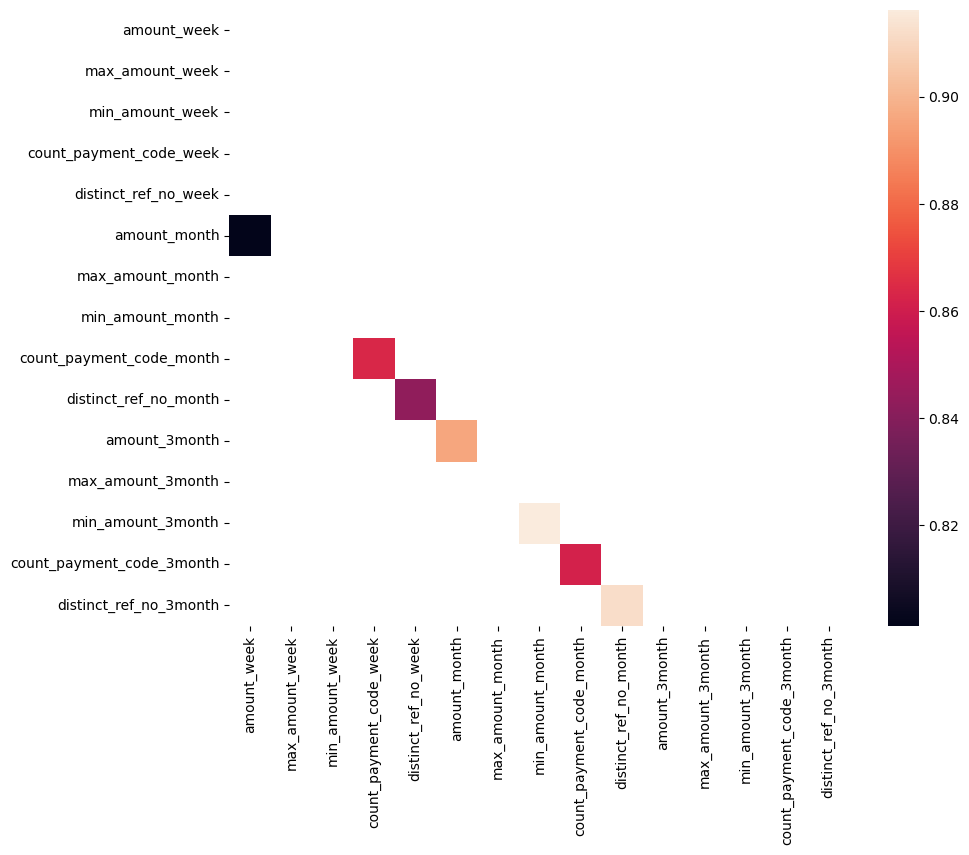

In [ ]:
plt.figure(figsize=(10,8))
corr_conti = (notna_nhomno[['amount_week','max_amount_week','min_amount_week','count_payment_code_week','distinct_ref_no_week',
         'amount_month','max_amount_month','min_amount_month','count_payment_code_month','distinct_ref_no_month',
         'amount_3month','max_amount_3month','min_amount_3month','count_payment_code_3month','distinct_ref_no_3month']].corr())
sns.heatmap(corr_conti[corr_conti>=0.8], mask=np.triu(corr_conti[corr_conti>=0.5]))

In [ ]:
notna_nhomno.loc[:,'3m_to_1m'] = notna_nhomno.loc[:,'amount_month'] - notna_nhomno.loc[:,'amount_3month']
notna_nhomno.loc[:,'1m_to_1w'] = notna_nhomno.loc[:,'amount_week'] - notna_nhomno.loc[:,'amount_month']
notna_nhomno.loc[:,'3m_to_1w'] = notna_nhomno.loc[:,'amount_week'] - notna_nhomno.loc[:,'amount_3month']

In [ ]:
notna_nhomno.loc[:,'3m_to_1m_positive'] = (notna_nhomno.loc[:,'3m_to_1m'] >= 0)
notna_nhomno.loc[:,'1m_to_1w_positive'] = (notna_nhomno.loc[:,'1m_to_1w'] >= 0)
notna_nhomno.loc[:,'3m_to_1w_positive'] = (notna_nhomno.loc[:,'3m_to_1w'] >= 0)

In [ ]:
cross_tab_prop1 = pd.crosstab(index=notna_nhomno['nhomno_xhtdJuin2021'],
                             columns=notna_nhomno['3m_to_1m_positive'],
                             normalize="index")
cross_tab_prop1

3m_to_1m_positive,False,True
nhomno_xhtdJuin2021,,
1.0,0.305996,0.694004
2.0,0.390123,0.609877
3.0,0.455564,0.544436
4.0,0.662185,0.337815
5.0,0.488372,0.511628


<Axes: xlabel='nhomno_xhtdJuin2021'>

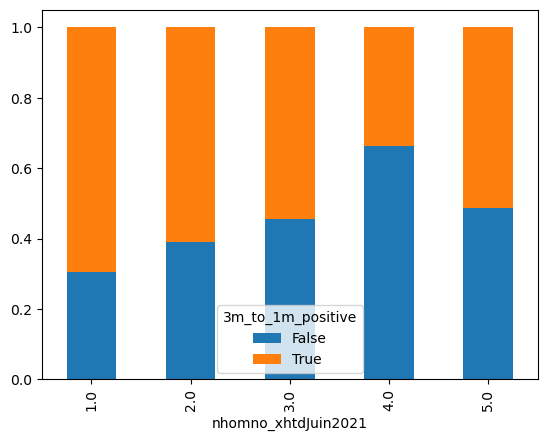

In [ ]:
cross_tab_prop1.plot(kind='bar', stacked=True) #OK

In [ ]:
notna_nhomno[notna_nhomno['3m_to_1m']>0][['amount_3month','amount_month','3m_to_1m']]

,amount_3month,amount_month,3m_to_1m
0,0.000014,0.000019,0.000005
1,0.000344,0.000468,0.000124
2,0.000028,0.000031,0.000004
3,0.000007,0.000011,0.000004
5,0.000051,0.000097,0.000047
...,...,...,...
29942,0.000031,0.000046,0.000015
29946,0.000013,0.000055,0.000042
29947,0.000006,0.000011,0.000005
29949,0.000002,0.000005,0.000003


#### Conclusion:
- Change in amount in the short term (3 month -> 1 month -> 1 week)

- Kết luận: Dùng change in amount 3 month - 1 month (vì 2 trường hợp còn lại không có nhiều sự khác biệt giữa các nhóm nợ)

<Axes: xlabel='max_month_binned', ylabel='Count'>

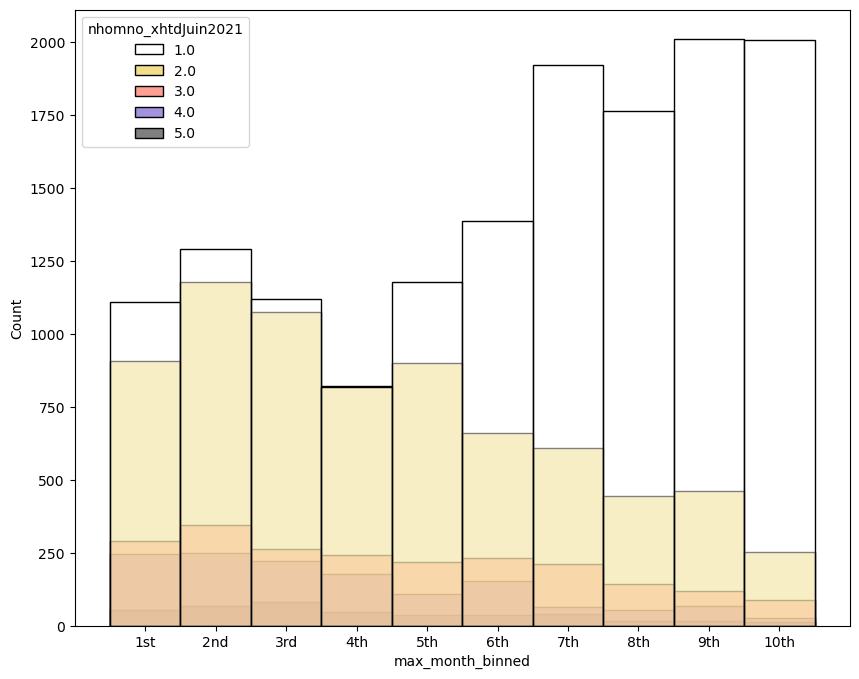

In [ ]:
# nhomno VS max_amount_month: OK
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
notna_nhomno.loc[:,'max_month_binned'] = pd.qcut(notna_nhomno['max_amount_month'], q=10, labels=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th'])

sns.histplot(data=notna_nhomno, x="max_month_binned", hue='nhomno_xhtdJuin2021', palette='CMRmap_r', ax=ax1)

<Axes: xlabel='amount_month_binned', ylabel='Count'>

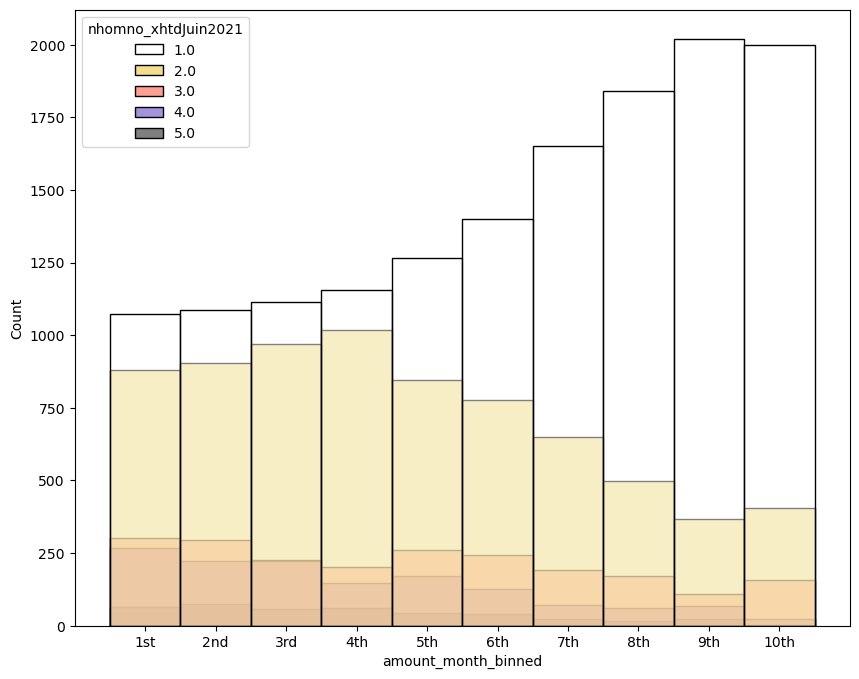

In [ ]:
# nhomno VS amount_month:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
notna_nhomno.loc[:,'amount_month_binned'] = pd.qcut(notna_nhomno['amount_month'], q=10, labels=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th'])

sns.histplot(data=notna_nhomno, x="amount_month_binned", hue='nhomno_xhtdJuin2021', palette='CMRmap_r', ax=ax1)

(0.0, 1000.0)

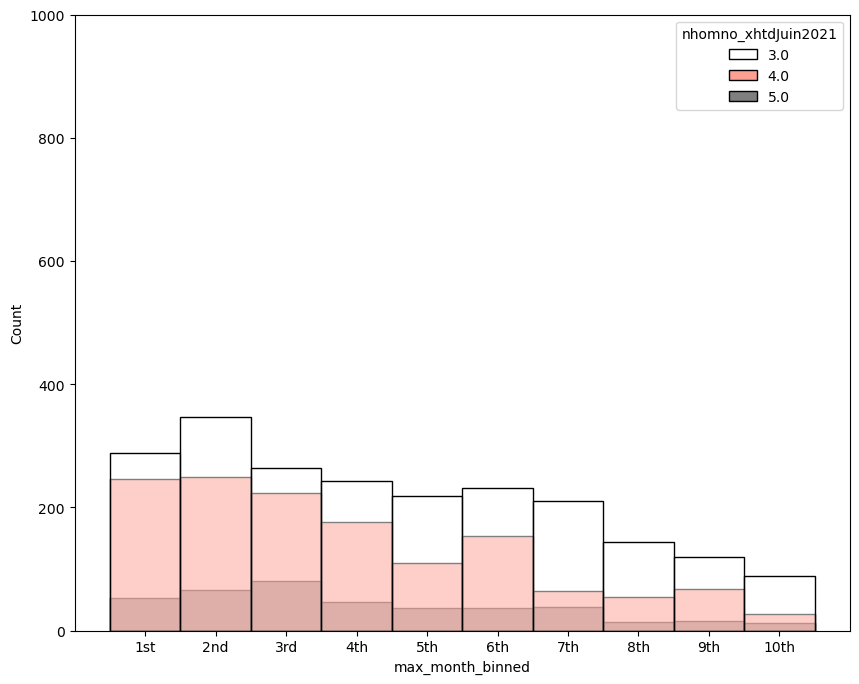

In [ ]:
# Riêng nhóm 3, 4, 5
plt.figure(figsize=(10,8))
sns.histplot(data=notna_nhomno[notna_nhomno['nhomno_xhtdJuin2021']>=3], x="max_month_binned", hue='nhomno_xhtdJuin2021', palette='CMRmap_r')
plt.ylim(0,1000)

<Axes: xlabel='amount_month_binned'>

<Figure size 1000x800 with 0 Axes>

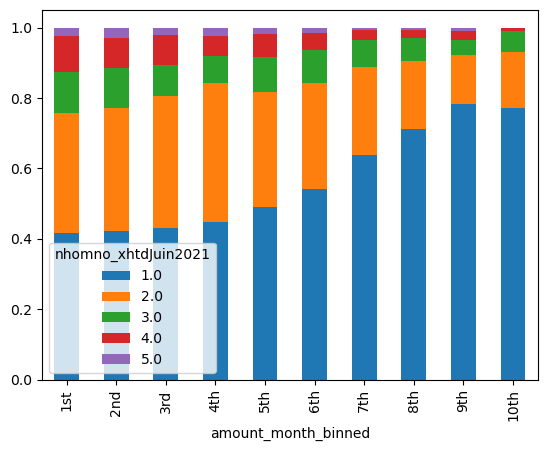

In [ ]:
# % KH trong mỗi nhóm nợ, chia theo nhóm amount
plt.figure(figsize=(10,8))
cross_tab_prop4 = pd.crosstab(index=notna_nhomno['amount_month_binned'],
                             columns=notna_nhomno['nhomno_xhtdJuin2021'],
                             normalize="index")
cross_tab_prop4.plot(kind='bar', stacked=True)

- Nhóm 1: Tập trung ở nhóm >6
- Nhóm 2: Tập trung ở nhóm 1-5
- Nhóm 3: Tập trung ở 4-6
- Nhóm 4, 5: Tập trung trung bình thấp

#### Comment: Customers with high transaction values seem to have a higher tendency to be in the credible groups.

==> amount_month can be a good predictor for the 'nhomno'
- It's a little bit counterintuitive for group 2 - the % of customers with high max transaction values being in group 2 decreases as the value increases
- Decrease for group 4 (ok)
- Decrease for group 5 (ok)

In [ ]:
# Số tiền giao dịch trung bình mỗi lần
notna_nhomno.loc[:,'avg_trans_month'] = notna_nhomno.loc[:,'amount_month'] / notna_nhomno.loc[:,'distinct_ref_no_month']
notna_nhomno.loc[:,'avg_trans_month'].describe()

count    2.584300e+04
mean              inf
std               NaN
min      7.985714e-09
25%      6.533333e-06
50%      1.556371e-05
75%      4.300378e-05
max               inf
Name: avg_trans_month, dtype: float64

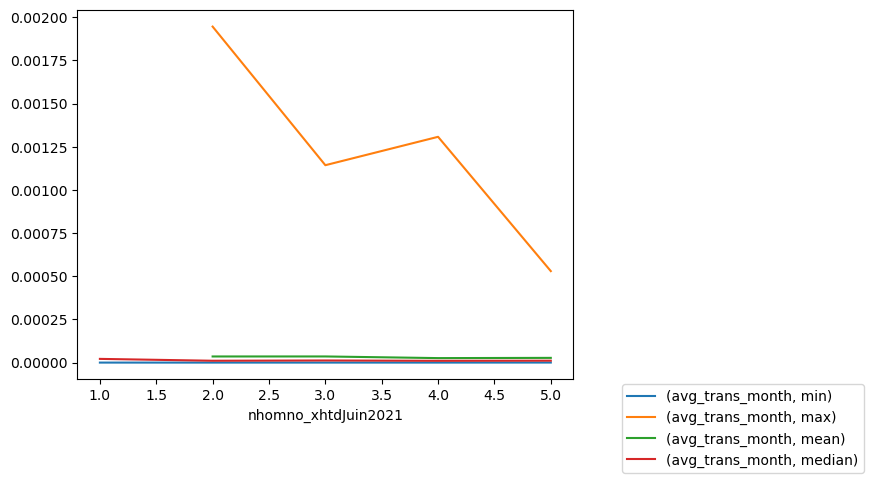

In [ ]:
a = notna_nhomno.groupby(['nhomno_xhtdJuin2021']).agg({'avg_trans_month': ['min','max','mean','median']}).plot()
plt.legend(bbox_to_anchor=(1.6,0.005))
# --> Không có ý nghĩa gì lắm

# Vấn đề là gì?
- Có nhiều interval trùng nhau ---> Vấn đề: Cần tìm ra điểm đặc trưng của mỗi nhóm -> mục đích: chia thành 2 nhóm (tốt, không tốt)
- Đã tách nhóm 1, gộp 4+5 --> Giờ cần tìm threshold giữa 2, 3, 4 để tách thành 2 nửa
- Khi predict thì làm thế nào? Predict 1+2, 3+4+5 hay tốt vs không tốt?

<Axes: xlabel='nhomno_xhtdJuin2021', ylabel='amount_month'>

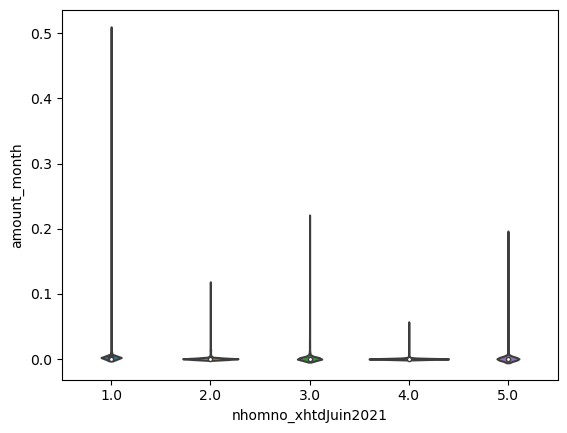

In [ ]:
sns.violinplot(data=notna_nhomno, x='nhomno_xhtdJuin2021', y='amount_month')

<Axes: xlabel='nhomno_xhtdJuin2021', ylabel='min_amount_month'>

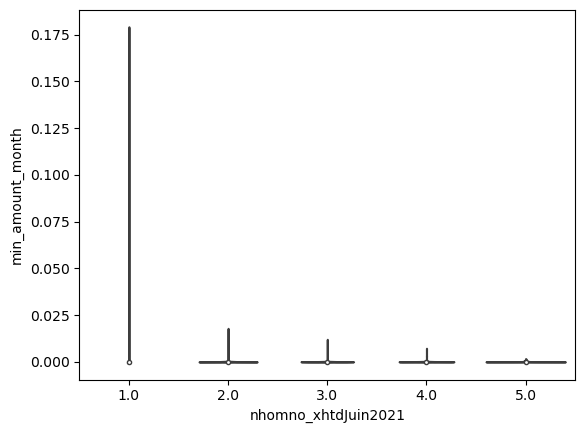

In [ ]:
sns.violinplot(data=notna_nhomno, x='nhomno_xhtdJuin2021', y='min_amount_month')

<Axes: xlabel='nhomno_xhtdJuin2021', ylabel='count_payment_code_week'>

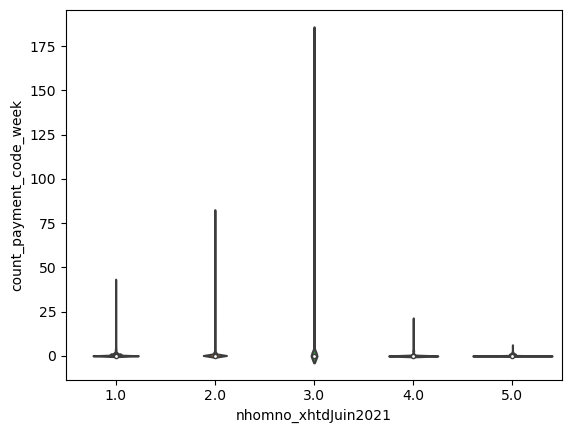

In [ ]:
sns.violinplot(data=notna_nhomno, x='nhomno_xhtdJuin2021', y='count_payment_code_week')

<Axes: xlabel='nhomno_xhtdJuin2021', ylabel='distinct_ref_no_week'>

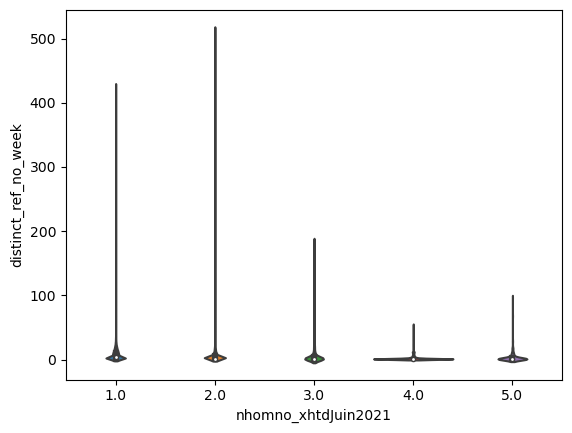

In [ ]:
sns.violinplot(data=notna_nhomno, x='nhomno_xhtdJuin2021', y='distinct_ref_no_week')

In [ ]:
notna_nhomno['nhomno_xhtdJuin2021'].value_counts()

nhomno_xhtdJuin2021
1.0    15827
2.0     8464
3.0     2678
4.0     2380
5.0      602
Name: count, dtype: int64

*văn bản in nghiêng*#### Average amount by month and by debt group

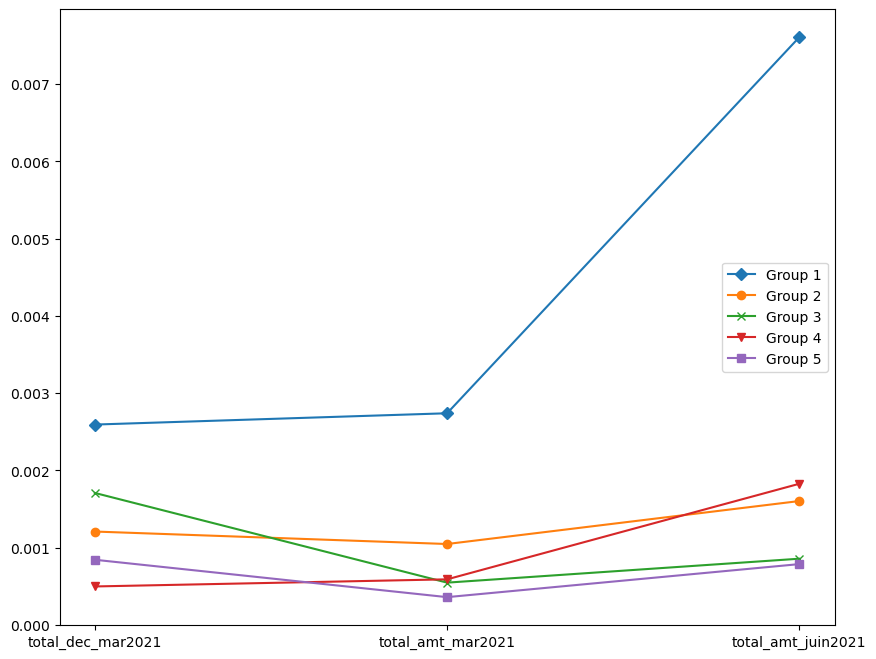

In [ ]:
dec = notna_nhomno.groupby('nhomno_xhtdJuin2021')['amount_month'].mean().reset_index()
mar = notna_nhomno.groupby('nhomno_xhtdJuin2021')['total_amt_mar2021'].mean().reset_index().drop('nhomno_xhtdJuin2021', axis=1)
jun = notna_nhomno.groupby('nhomno_xhtdJuin2021')['total_amt_juin2021'].mean().reset_index().drop('nhomno_xhtdJuin2021', axis=1)
amount_dec_mar_jun = pd.concat([dec, mar, jun], axis=1).set_index('nhomno_xhtdJuin2021')
amount_dec_mar_jun = amount_dec_mar_jun.T.rename(index={'amount_month': 'total_dec_mar2021'})

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.plot(amount_dec_mar_jun.index, amount_dec_mar_jun.iloc[:,0], label='Group 1', marker='D')
plt.plot(amount_dec_mar_jun.index, amount_dec_mar_jun.iloc[:,1], label='Group 2', marker='o')
plt.plot(amount_dec_mar_jun.index, amount_dec_mar_jun.iloc[:,2], label='Group 3', marker='x')
plt.plot(amount_dec_mar_jun.index, amount_dec_mar_jun.iloc[:,3], label='Group 4', marker='v')
plt.plot(amount_dec_mar_jun.index, amount_dec_mar_jun.iloc[:,4], label='Group 5', marker='s')

ax.legend(loc='right')

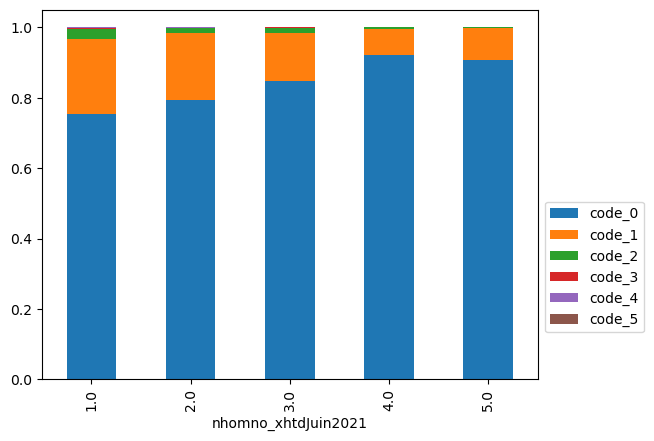

In [ ]:
# Tìm tỉ lệ sử dụng so với # khách hàng mỗi debt group --> Tìm xem dịch vụ nào là tốt

payment_code = notna_nhomno.groupby(['nhomno_xhtdJuin2021', 'distinct_payment_code_week']).size().unstack().replace(np.nan, 0)

payment_code['total'] = payment_code.sum(axis=1)
payment_code['code_0'] = payment_code.iloc[:,0] / payment_code.iloc[:,6]
payment_code['code_1'] = payment_code.iloc[:,1] / payment_code.iloc[:,6]
payment_code['code_2'] = payment_code.iloc[:,2] / payment_code.iloc[:,6]
payment_code['code_3'] = payment_code.iloc[:,3] / payment_code.iloc[:,6]
payment_code['code_4'] = payment_code.iloc[:,4] / payment_code.iloc[:,6]
payment_code['code_5'] = payment_code.iloc[:,5] / payment_code.iloc[:,6]
payment_code.drop([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 'total'], axis=1, inplace=True)

ax2 = payment_code.plot(kind='bar', stacked=True)
ax2.legend(bbox_to_anchor =(1, 0.5))

### PCA

In [ ]:
amount = df[['nhomno_xhtdJuin2021',
         'amount_week','max_amount_week','min_amount_week','count_payment_code_week','distinct_trans_group_week','distinct_ref_no_week',
         'amount_month','max_amount_month','min_amount_month','count_payment_code_month','distinct_trans_group_month','distinct_ref_no_month',
         'amount_3month','max_amount_3month','min_amount_3month','count_payment_code_3month','distinct_trans_group_3month','distinct_ref_no_3month']][df['nhomno_xhtdJuin2021'].notnull()].dropna(how='any')

In [ ]:
amount.isnull().sum()

nhomno_xhtdJuin2021            0
amount_week                    0
max_amount_week                0
min_amount_week                0
count_payment_code_week        0
distinct_trans_group_week      0
distinct_ref_no_week           0
amount_month                   0
max_amount_month               0
min_amount_month               0
count_payment_code_month       0
distinct_trans_group_month     0
distinct_ref_no_month          0
amount_3month                  0
max_amount_3month              0
min_amount_3month              0
count_payment_code_3month      0
distinct_trans_group_3month    0
distinct_ref_no_3month         0
dtype: int64

# 3. MODELLING:
### -- Logistic Regression
### -- k-NN

## 3.0. Datasets:

### Preprocessing step: Dummy variables + Drop null

In [ ]:
df_encoded = notna_nhomno.drop(columns=['savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo', 'totalLoginMar2021_heoSo', 'totalLoginJuin2021_heoSo', 'totalSavings2021_heoSo'])\
            .replace(to_replace={'nhomno_xhtdJuin2021':{1:0,
                                                        2:0,
                                                        3:1,
                                                        4:1,
                                                        5:1}})\
            .dropna(subset=['amount_month','min_amount_month','distinct_ref_no_month'])

In [ ]:
df_encoded_dummies = pd.get_dummies(data=df_encoded,
                     columns=["local_ref_1","vn_marital_status","most_act_juin2021","loaikyhanJuin2021"],
                     prefix="DUM",
                     prefix_sep="_",
                     drop_first=True)

In [ ]:
df_tree = df_encoded_dummies.reset_index()

In [ ]:
df_tree

,level_0,index,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,DUM_Seperated,DUM_Single,DUM_Widow,DUM_phi tai chinh,DUM_rut tien atm,DUM_thanh toan,DUM_tiet kiem,DUM_vay,DUM_NH,DUM_TH
0,0,1,79.0,769.0,27097.0,1986.0,0.0,0.000127,0.000706,0.0,...,False,True,False,False,False,True,False,False,False,False
1,1,7,38.0,394.0,15436.0,1992.0,0.0,0.000476,0.000011,0.0,...,False,False,False,False,False,False,False,False,True,False
2,2,11,64.0,632.0,23899.0,1987.0,0.0,0.000025,0.000029,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3,12,56.0,568.0,22357.0,1996.0,0.0,0.000014,0.000079,0.0,...,False,True,False,False,False,False,False,False,True,False
4,5,16,1.0,250.0,8980.0,1975.0,0.0,0.000195,0.000518,0.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,29944,99848,52.0,540.0,21553.0,1982.0,0.0,0.000002,0.000011,1.0,...,False,False,False,False,False,True,False,False,False,True
26478,29946,99850,48.0,493.0,20263.0,1988.0,0.0,0.000025,0.000109,0.0,...,False,True,False,False,False,False,False,False,False,True
26479,29947,99853,1.0,3.0,94.0,1992.0,0.0,0.000013,0.000073,0.0,...,False,False,False,False,False,False,False,False,True,False
26480,29949,99915,89.0,883.0,30310.0,1985.0,0.0,0.000041,0.000224,0.0,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26482 entries, 0 to 26481
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   level_0                       26482 non-null  int64  
 1   index                         26482 non-null  int64  
 2   resid_province                26482 non-null  float64
 3   resid_district                26482 non-null  float64
 4   resid_wards                   24455 non-null  float64
 5   birth_incorp_date             26482 non-null  float64
 6   amount_week                   26482 non-null  float64
 7   max_amount_week               26482 non-null  float64
 8   min_amount_week               26482 non-null  float64
 9   distinct_payment_code_week    26482 non-null  float64
 10  count_payment_code_week       26482 non-null  float64
 11  distinct_trans_group_week     19596 non-null  float64
 12  distinct_ref_no_week          26482 non-null  float64
 13  a

In [ ]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26482 entries, 0 to 26481
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   level_0                       26482 non-null  int64  
 1   index                         26482 non-null  int64  
 2   resid_province                26482 non-null  float64
 3   resid_district                26482 non-null  float64
 4   resid_wards                   24455 non-null  float64
 5   birth_incorp_date             26482 non-null  float64
 6   amount_week                   26482 non-null  float64
 7   max_amount_week               26482 non-null  float64
 8   min_amount_week               26482 non-null  float64
 9   distinct_payment_code_week    26482 non-null  float64
 10  count_payment_code_week       26482 non-null  float64
 11  distinct_trans_group_week     19596 non-null  float64
 12  distinct_ref_no_week          26482 non-null  float64
 13  a

In [ ]:
#Split train test split
X_all = df_tree[[
        'amount_month','min_amount_month','distinct_payment_code_month','count_payment_code_month','distinct_ref_no_month',
        'DUM_Seperated','DUM_Married', 'DUM_Other', 'DUM_Partner', 'DUM_Single', 'DUM_Widow',
        'DUM_phi tai chinh', 'DUM_rut tien atm', 'DUM_thanh toan', 'DUM_tiet kiem', 'DUM_vay',
        'DUM_NH', 'DUM_TH',
        'categoryJuin2021', 'sectorJuin2021','balanceJuin2021','3m_to_1m_positive','nominal_interestJuin2021'
        ]].replace(np.nan, 0)
Y_all = df_tree['nhomno_xhtdJuin2021'].astype('int')

KeyError: "['3m_to_1m_positive'] not in index"

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_all, Y_all , test_size=0.2, random_state= 24)

In [ ]:
print(len(train_set), len(test_set))

# 3.2. kNN:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
print("Kích thước của X_test:", X_train.shape)
print("Kích thước của y_test:", y_train.shape)

Kích thước của X_test: (20674, 23)
Kích thước của y_test: (20674,)


In [ ]:
# Calculate accuracy scores corresponding to k
from sklearn.neighbors import NearestNeighbors
accuracy_scores = {}
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2, algorithm = 'brute')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores[i] = accuracy_score(y_test,y_pred)
print(accuracy_scores)

{1: 0.8605146063068292, 2: 0.8620622944476688, 3: 0.8359450570710002, 4: 0.8514219384793964, 5: 0.8436834977751982, 6: 0.8496807893209518, 7: 0.844844263880828, 8: 0.8475527181272974, 9: 0.845231185916038, 10: 0.8481331011801122, 11: 0.8460050299864578, 12: 0.8475527181272974, 13: 0.845231185916038, 14: 0.8502611723737666, 15: 0.8477461791449024, 16: 0.849293867285742, 17: 0.8473592571096924, 18: 0.8485200232153222, 19: 0.8467788740568776, 20: 0.8461984910040626, 21: 0.8461984910040626, 22: 0.8461984910040626, 23: 0.8444573418456182, 24: 0.844844263880828, 25: 0.8442638808280132, 26: 0.8458115689688528, 27: 0.8469723350744824, 28: 0.8465854130392726, 29: 0.8471657960920874}


Optimal k: 2


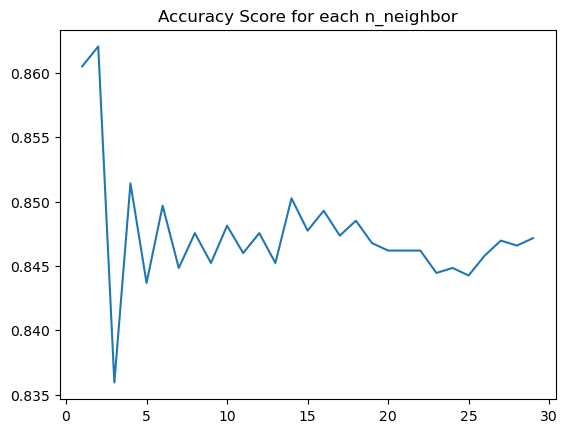

In [ ]:
# Plot accuracy scores
plt.plot(list(accuracy_scores.keys()),list(accuracy_scores.values()))
optimal_k = max(accuracy_scores.items(), key = lambda k : k[1])
plt.title('Accuracy Score for each n_neighbor')
print('Optimal k: {}'.format(optimal_k[0]))

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2, algorithm = 'brute') # p=2: Euclidean distance; brute: có bao nhiêu item so sánh bấy nhiêu -> áp dụng cho small dataset only
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=2)

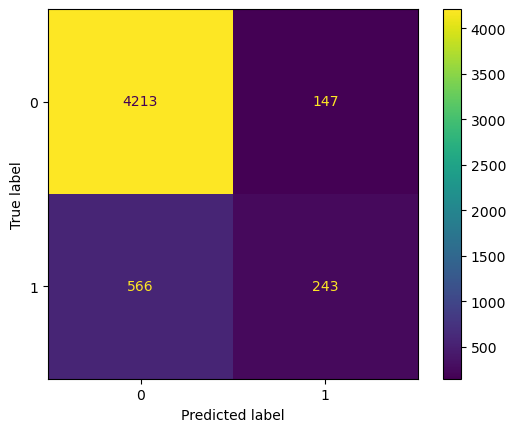

In [ ]:
yhat_knn_test = clf_knn.predict(X_test)
dm = confusion_matrix(y_test,yhat_knn_test)
disp = ConfusionMatrixDisplay( confusion_matrix = dm)
disp.plot()

In [ ]:
print(classification_report(y_test,yhat_knn_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4360
           1       0.62      0.30      0.41       809

    accuracy                           0.86      5169
   macro avg       0.75      0.63      0.66      5169
weighted avg       0.84      0.86      0.84      5169



## 3.3. Logistic Regression:

In [ ]:
logreg1 = LogisticRegression(max_iter=1000)
logreg1.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
yhat_logreg_test = logreg1.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, yhat_logreg_test)

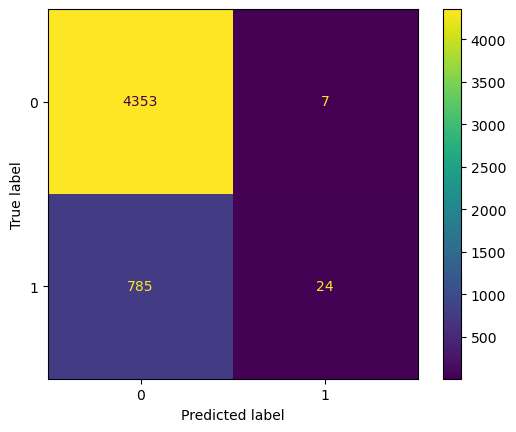

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(y_test, yhat_logreg_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      4360
           1       0.77      0.03      0.06       809

    accuracy                           0.85      5169
   macro avg       0.81      0.51      0.49      5169
weighted avg       0.84      0.85      0.78      5169



In [ ]:
#Do F1 score và acc của kNN cao hơn nên mô hình kNN đc chọn